# Diabetes Data Set

### Introduction: 

The data set I have today is from UCI repository, "Pima Indian diabetes", which has 768 records, 8 attributes, 2 classes, 268 positive resultd for a diabetes test and 500 negative results. All patients were female at least 21 years old of Pima Indian heritage. Based on different features, the goal is to be able to predict whether a person has diabetes or not. 

In this project I will analyze the data from initial statistical step to building different modles and testing them. First, I will try to get the general statistical summary, based on the data that we have without cleansing the data. I will then do a comprehensive EDA, create logistic regression (logit) and return a classification vector. This project will also include creating my own logistic regression model, using SMOTE to fix the imbalanced data, create logistic regression with new SMOTE data. Resetting performance matrix, crating confusion matrix as well as a ROC curve, getting chi-square and p-value and accessing data as part of feature engineering, creating model using SVM or KNN and compare them with logistic regression model are also part of this project. All of these activities in most part will be performed in the order they are mentioned here. And at the end, there will be a general summary of the project. At the end of the project, there will be a reference page, which will have links and sources for all the citations and helps taken to complete this project.

### Uploading data set in pandas

I have uploaded the given data set into GitHub and then loaded that data into pandas for my analytics. The given data set has not been changed in any way before uploading. 

In [307]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

# uploading data to pandas

original_df = pd.read_csv('https://raw.githubusercontent.com/kuinkelarun/Project-1_Diabetes-/main/diabetes.csv', header=None)

#prints few lines of the sample table including the deader 

original_df.head()

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


### Assigning column names

The column names appear to be on  the first row of the data set. In this step, I am dropping the first row where the column names appear. And, assign column name as columns for the data set.

In [3]:
# make a copy of original data
df = original_df.copy()

# drop first row
df = df.drop(0)

# assign meaningful column names on the column section
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

#sample output of data
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### Generate Summary

In order to find out preliminary statistics of the data set, general statistics using descrie() function is generated. 

In [4]:
# general stat

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,99,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


The data set has total of 768 rows and 9 columns. This table does not give us much insight about the data. 

### Attributes: 

The attributes that provide framework in which the given data is analyzed. Each attribute have some meaning, which can be used in different ways during our analysis. 

Following are the brief explanation for each of the attributes: 
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test. This test is done to measure level of glucose in the blood during pregnency. A normal blood glucose level is lower than 155 mg/dl (10 mmol/L) for 2 hour in glucose tolerance test. If the result is higher than normal, one will have to test again. 
- BloodPressure: Diastolic blood pressure (measured in mmHg). This kind of blood pressure is caused when ones heart relaxes and fills with blood
- SkinThickness: Triceps skin fold thickness (measured in mm). 12 mm and 23 mm is normal thickness in males and females respectively
- Insulin: 2-Hour serum insulin (measured mu U/ml). Normal leve 0-75 U/ml) "This 2 hour Glucose Tolerance Test with Insulin levels is used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels. This test is typically ordered when an individual may be at risk for diabetes or has had elevated glucose levels previously."
- BMI: Body mass index (mesured-  weight in kg/(height in m)^2). Normal BMI range 18.5 - 24.9, while 12 as the lower limit for survival. BMI above 40 is considered mornid obesity and is rare (1% men and 2% women). 
- Diabetes pedigree function: It indicates the function which scores likelihood of diabetes based on family histry
- Age: Age of an individual
- Outcome: Whether or not an individual have diabetes (We assume:  1 for yes, 0 for no)

There are not any statistical calculations besides count, unique, top and frequency. We can sense that there are some things that need to be addressed before we can say anything more about the data set.



Looking at the sample data sets in previous boxes, most or all of the dats should be of numeric data type. However, if we look at the table generated by describe() function in the previous box, we do not see any mean, stadard deviation or median values. So, it's worth looking at the data informations. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


As, we can see all of the data are listed as object data types, even though most of them if not all should be numeric based on the type of attributes they have. 

We will convert the data types where appropriate to numeric and generate general statistics again in the next section.  

### Exploratory Data Analytics (EDA):

I will be conducting a comprehensive EDA on the given data set in this section. I will also be making at least two references on the 7 stories one can tell with data. 

#### Converting to numeric

In [6]:

# df = df.apply (pd.to_numeric)

df = df.apply (pd.to_numeric, errors='coerce')


In [7]:
# checking if there are still null values

df.columns[df.isnull().any()]

Index([], dtype='object')

#### General stat

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Having converted the data set to numeric, a lot more information is generated which can be interpreted. 

Following few things are noticable when we go through each of the attributes: 
- Pregnencies: The maximum number of pregnencies is 17, which is not an impossible number but, we need to varify if that is actually 17 or was error in data entry
- Glucose: The blood glucose level lower than 155 mg/dl is considered normal for plasma glucose concentration at 2 hour in an oral glucose tolerance test, but I highly doubt it will ever be zero. We will look into it in detail in the next section
- Blood pressure: Blood pressure of a alive person can not be at zero for min value
- SkinThickness: Skin fold thickness for of a person cannot be a zero
- Insulin: Insulin being zero is highlu unlikely but it is possible, we will look at how many of them have such condition and determine if they are accurate or not
- BMI: BMI should not be of zero value, BMI less than 18.49 is considered underweight. Unless someone is critical medical condition, BMI is higher than zero

I will be doing data cleaning when I deal with preparing data, however I will move on to gather some graphical representations of the current data. 

In [9]:
#corelation map of data (non catogerical data)
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

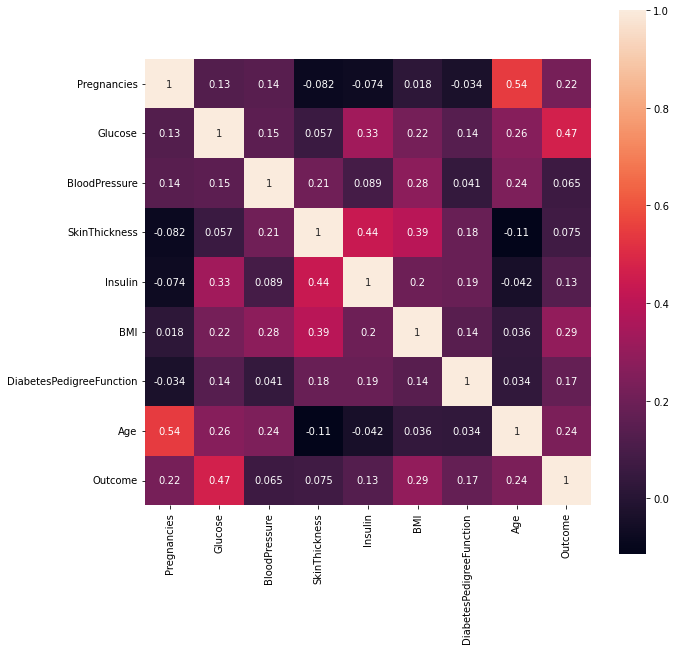

In [10]:
# corelation map in sns heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

From the above corelation table and diagram, I can say that few things that are in desirable corelation range are BMI and SkinThickness, Pregnencies and Age, Insuline and Glucose level.

<AxesSubplot:xlabel='Insulin'>

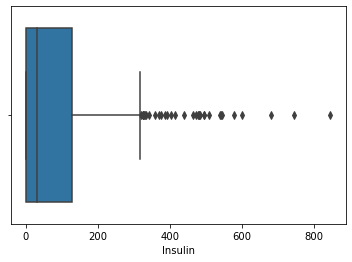

In [11]:
sns.boxplot(df.Insulin)

Insulin data is highly imbalanced, it has very high amount of outliers.

<AxesSubplot:xlabel='SkinThickness'>

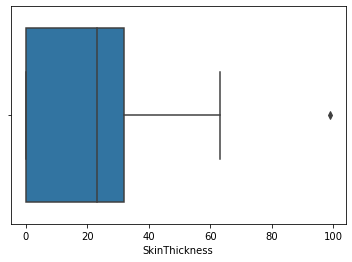

In [12]:
sns.boxplot(df.SkinThickness)

Even skin thickness has very high amount of outliers. 

#### Coefficient Interpretations

In [13]:
df.groupby('Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


Looking at the above table, it looks like older women in general have more number of pregnencies. 

In [14]:
df.groupby('BloodPressure').mean()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,,,,,,,,
0,3.628571,117.800000,1.514286,0.000000,25.705714,0.388429,30.714286,0.457143
24,1.000000,89.000000,19.000000,25.000000,27.800000,0.559000,21.000000,0.000000
30,1.000000,95.500000,40.000000,91.000000,49.150000,0.339500,29.500000,0.500000
38,1.000000,109.000000,18.000000,120.000000,23.100000,0.407000,26.000000,0.000000
40,0.000000,137.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000
44,3.250000,110.500000,25.000000,71.750000,28.175000,0.408250,27.000000,0.000000
46,1.500000,133.000000,20.000000,209.000000,31.550000,0.415000,22.000000,0.000000
48,2.000000,80.000000,23.000000,87.000000,32.280000,0.450000,23.800000,0.200000
50,2.461538,124.076923,22.000000,124.461538,28.846154,0.586385,29.000000,0.384615


In [15]:
df.groupby('BMI').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
BMI,,,,,,,,
0.0,3.909091,104.272727,28.818182,4.181818,8.090909,0.433273,30.454545,0.181818
18.2,1.000000,92.333333,67.333333,11.333333,27.333333,0.356667,23.000000,0.000000
18.4,0.000000,104.000000,76.000000,0.000000,0.000000,0.582000,27.000000,0.000000
19.1,1.000000,80.000000,55.000000,0.000000,0.000000,0.258000,21.000000,0.000000
19.3,3.000000,99.000000,80.000000,11.000000,64.000000,0.284000,30.000000,0.000000
...,...,...,...,...,...,...,...,...
53.2,0.000000,162.000000,76.000000,56.000000,100.000000,0.759000,25.000000,1.000000
55.0,1.000000,88.000000,30.000000,42.000000,99.000000,0.496000,26.000000,1.000000
57.3,3.000000,123.000000,100.000000,35.000000,240.000000,0.880000,22.000000,0.000000


From the above 10 rows, it seems that higher the BMI, higher the Glucose level, also higher SkinThickness. If we look at the output column, it is seen that individuals with highest five BMI all have Outcome "1", which means they have diabetes. It can be said that BMI is highly corelated to diabetes. 

#### Using Matplotlib and Seaborn to make scatterplot 

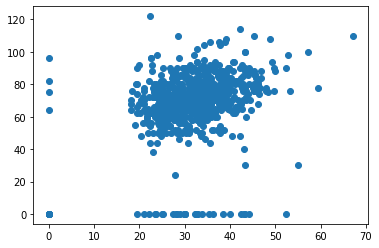

In [16]:
plt.scatter( df['BMI'], df['BloodPressure'],)
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

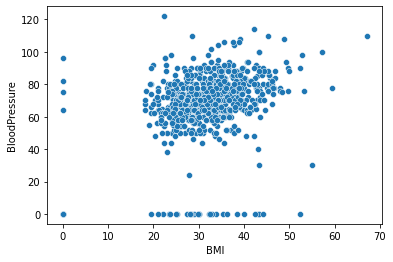

In [17]:
sns.scatterplot(x='BMI', y='BloodPressure', data=df)

The scatterplot shows that the variables BMI and BloodPressure are not much corelated. The data also have a lot of outliers.

#### Boxplot to show relationship between two variables

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

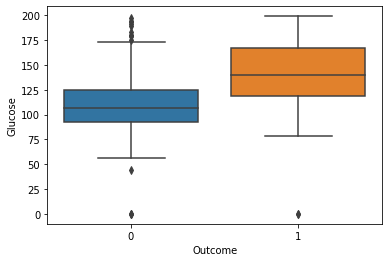

In [18]:
# sns.scatterplot(x='Outcome', y='Glucose', data=df)

sns.boxplot(data=df, y = 'Glucose', x = 'Outcome')

The individual womens with higher Glucose lever are more likely to have diabetes. 

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

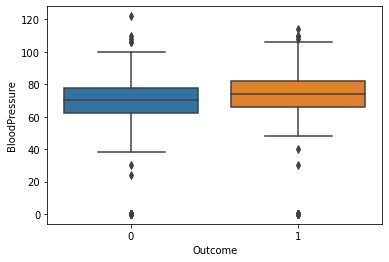

In [19]:
sns.boxplot(data=df, y = 'BloodPressure', x = 'Outcome')

As per this diagram, blood pressure have a little to do with diabetes.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

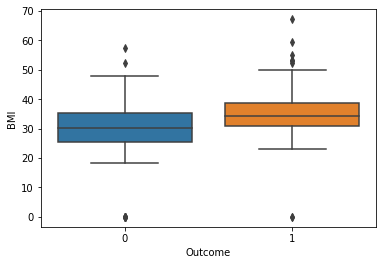

In [20]:
sns.boxplot(data=df, y = 'BMI', x = 'Outcome')

Higher BMI has slight chance of having diabetes. 

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

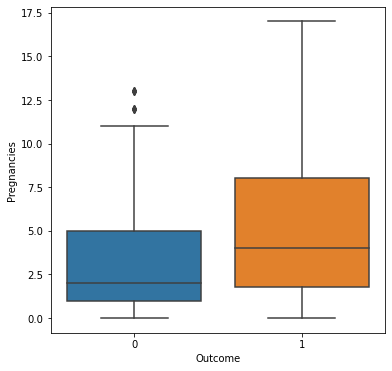

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, y = 'Pregnancies', x = 'Outcome')

The above box plot shows that women with higher number of pregnancies have slightly high rate of having diabetes. 

### Handling outliers

As I have pointed out earlier, there are few attributes that have zero values where it does not make sense having zero values. We will try to analyze them and deal with them as necessary. 

In [134]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [186]:
# copy df to new df
new_df = df.copy()

#let the Outcome column be categorical
# new_df['Outcome'] = pd.Categorical(new_df.Outcome)

In [188]:
new_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Glucose:

The glucose level being zero is highly unlikely, 155 mg/dl or lower glucose level is preferred however it cannot be as low as zero. We will find out how many such values are there and deal with them.

In [187]:
# find out how many rows have blood pressure 0
print(new_df[new_df.Glucose == 0].shape[0])

# #find out which age group has missing Glucose dta
# print(df[df.Glucose == 0].groupby('Age') ['Glucose'].count())

# locating the index of '0' character 
new_df.loc[new_df['Glucose']== 0]

5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
76,1,0,48,20,0,24.7,0.140,22,0
183,1,0,74,20,23,27.7,0.299,21,0
343,1,0,68,35,0,32.0,0.389,22,0
350,5,0,80,32,0,41.0,0.346,37,1
503,6,0,68,41,0,39.0,0.727,41,1


We can see that most of the womens whose blood pressure data is missing do not have diabetes. Which is why replacing their glucose level with median value will not change the course of our data. Also, because rest of the attributes have valuable information, it is a good idea to replace zzero with median.

In [189]:
# replacing glucose 0 values with median
median_val = new_df['Glucose'].median(skipna=True)

new_df['Glucose'] = new_df.Glucose.mask(new_df.Glucose == 0, median_val )

# or use following will also do the job
# new_df.Glucose.loc[new_df.Glucose == 0, 'Glucose'] = median_val


In [190]:
new_df.loc[new_df['Glucose']== 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Before: 

<AxesSubplot:xlabel='Glucose'>

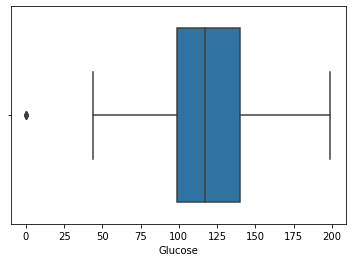

In [191]:
sns.boxplot(df.Glucose)

After: 

<AxesSubplot:xlabel='Glucose'>

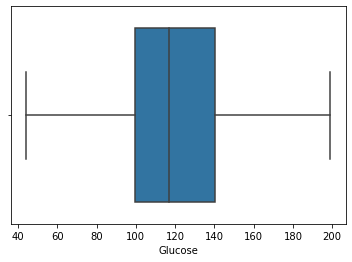

In [192]:
sns.boxplot(new_df.Glucose)

After we replaced the Glucose missing data with median value, the boxplot for glucose shows that there is a good distribution of data.

#### BloodPressure:

Blood pressure of a alive human being cannot be at zero. Which is why we will look into this attribute and try to deal with them as necessaty. 

In [193]:
# find out how many rows have blood pressure 0
print(new_df[new_df.BloodPressure == 0].shape[0])

# locating the index of '0' character 
df.loc[df['BloodPressure']== 0]


35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,10,115,0,0,0,35.3,0.134,29,0
16,7,100,0,0,0,30.0,0.484,32,1
50,7,105,0,0,0,0.0,0.305,24,0
61,2,84,0,0,0,0.0,0.304,21,0
79,0,131,0,0,0,43.2,0.270,26,1
82,2,74,0,0,0,0.0,0.102,22,0
173,2,87,0,23,0,28.9,0.773,25,0
194,11,135,0,0,0,52.3,0.578,40,1
223,7,119,0,0,0,25.2,0.209,37,0
262,3,141,0,0,0,30.0,0.761,27,1


There are 35 rows which does not have measurement of blood pressure. 35 is only 4.56% percentage of the total 768 and the 75th percentile of the individuals have bloodpressure less than 80, it is appropriate to replace the bloodpressure with median value which is 72. 

In [194]:
# replacing BloodPressure values with median
median_val = new_df['BloodPressure'].median(skipna=True)

new_df['BloodPressure'] = new_df.BloodPressure.mask(new_df.BloodPressure == 0, median_val )


Before:

<AxesSubplot:xlabel='Glucose'>

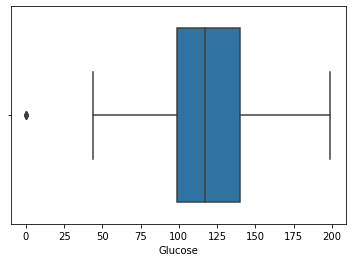

In [195]:
sns.boxplot(df.Glucose)

After:

<AxesSubplot:xlabel='Glucose'>

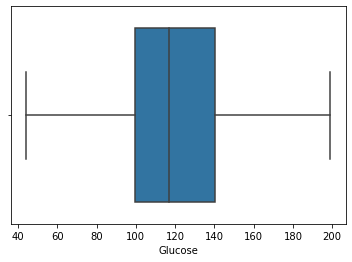

In [196]:
sns.boxplot(new_df.Glucose)

#### BMI:

Unless someone is critically ill or is in a very bad medical condition, BMI should not be zero. Let's look at rows with BMI value zero and see which approach will be best to apply dealing with those missing values.

In [197]:
# find out how many rows have BMI 0
print(new_df[new_df.BMI == 0.0].shape)

# locating the index of '0' character 
df.loc[df['BMI']== 0.0]

(11, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,8,125,96,0,0,0.0,0.232,54,1
50,7,105,0,0,0,0.0,0.305,24,0
61,2,84,0,0,0,0.0,0.304,21,0
82,2,74,0,0,0,0.0,0.102,22,0
146,0,102,75,23,0,0.0,0.572,21,0
372,0,118,64,23,89,0.0,1.731,21,0
427,0,94,0,0,0,0.0,0.256,25,0
495,3,80,0,0,0,0.0,0.174,22,0
523,6,114,0,0,0,0.0,0.189,26,0
685,5,136,82,0,0,0.0,0.640,69,0


There are only few rows where BMI values are missing, and it makes sense to replace them with median since majority of the data set provides information on BMI. Changing these rows with median will likely make our data set more robust. 

In [198]:
# replacing BMI values with median
# new_df.fillna(new_df.median())
median_val = new_df['BMI'].median(skipna=True)

new_df['BMI'] = new_df.BMI.mask(new_df.BMI == 0, median_val )



After replacing zero values with median: 

<AxesSubplot:xlabel='BMI'>

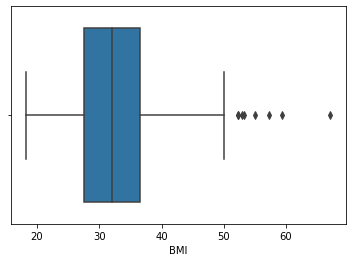

In [199]:
sns.boxplot(new_df.BMI)

There are still quite a few number of outliers in BMI. Lets try and solve them. 

In [200]:
new_df.loc[new_df['BMI'] > 60].shape

(1, 9)

Because there are 41 values that are greater than 60, it is hard to conclude that those values are mis inputed in the data set. Those outliers could mean there are some individuals who are highly obessed. 

#### SkinThickness:



<AxesSubplot:xlabel='SkinThickness'>

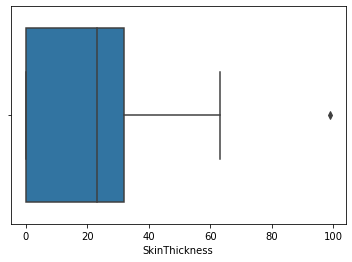

In [201]:
sns.boxplot(new_df.SkinThickness)

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

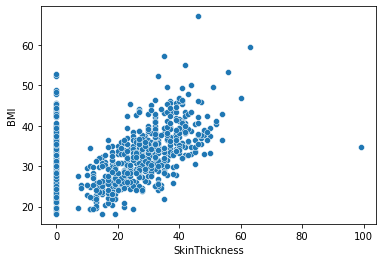

In [202]:
sns.scatterplot(x='SkinThickness',
                    y='BMI',
                    data=new_df)

The box plot shows that there are some outliers in the higher side of the SkinThickness data. Looking at the BMI data, there are a lot of people with very high BMI which means, there are a lot of individuals with high skin thickenss. Looking at the scatter plot we can assume that higher BMI and SkinThickness are somehow corelated. 

In [203]:
# find out number of zeroes in each attributes

print(new_df[new_df.SkinThickness == 0].shape[0])

print(new_df[new_df.Insulin == 0].shape[0])

227
374


Skin thickness and Insulin has a very high number of missing values. These columns can be dropped manually or might aswell get dropped while using machine learning algorithms during feature selection. 

We are going to ignore the zero values in the variables Insuline and SkinThickness because they have the least ratio. Removing them will result to loose a lot of data because they are at least 25% of the data. We will pay close attention in the feature selection section to see whether or not these two columns are ignored for further analysis. 

#### Histogram

We have performed most of our EDA data cleaning a little bit at this point. The following histogram will show us the range of data that we have. 

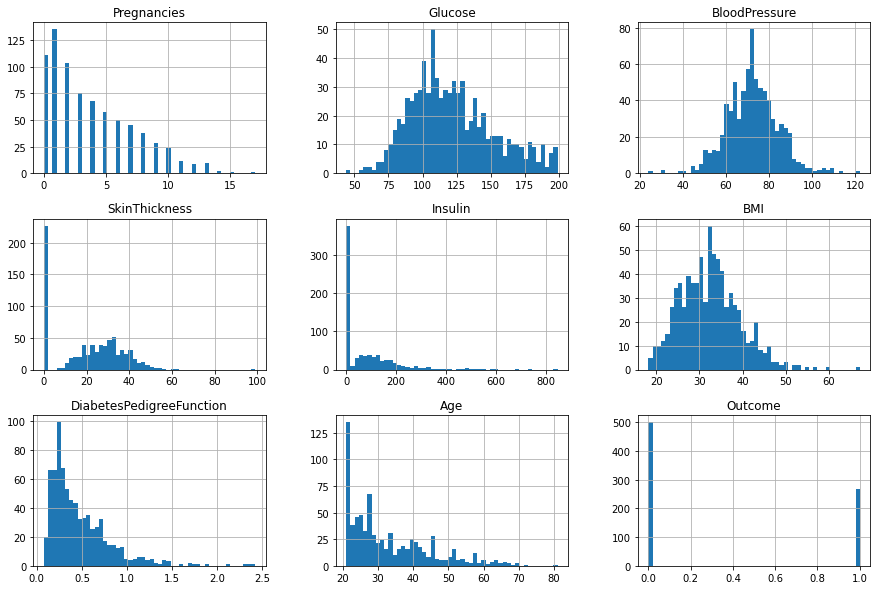

In [204]:
#histograms
new_df.hist(bins=50, figsize=(15,10))
plt.show()

If we were to ignore outlier values at 0 in skin thickness and insuline, the rest of the graph looks fine. There are some high values in age, but we already know that some people are close to 80 years and most of the women were of the age 21. 

The following test is to see if each of the attributes line up with being diabetic. The test is to find out if we have enough data to jump on to conclusion to say certain variable are true.

In [205]:
def theTest(val, condition):
  fft = pd.DataFrame(new_df[val])
  fft['Outcome'] = df['Outcome']
  records = fft[fft[val] >= condition]
  counter1 = 0
  counter2 = 0
  for index, row in records.iterrows():
    counter1 = counter1 + 1
    if (row['Outcome'] == 1):
      counter2 = counter2 + 1
  print(counter2/counter1)

letsSeeIfItMatters = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for k in letsSeeIfItMatters:
  print(k) 
  theTest(k, 1)

# print('uer')
# theTest('uer',10)

Pregnancies
0.350076103500761
Glucose
0.3489583333333333
BloodPressure
0.3489583333333333
SkinThickness
0.33271719038817005
Insulin
0.3299492385786802
BMI
0.3489583333333333
DiabetesPedigreeFunction
0.5686274509803921
Age
0.3489583333333333


Looking at the above analysis, it appears that almost all of the attributes have same level of impact on someone being diabetic. Besides DiabetesPedigreeFunction, all other variables have very low relation with being diabetic. It is true that not one single variable cannot tell us if someone has diabeties, however it also makes difficult to predict if certain variables are more responsible in having diabeties.

In [206]:
#use pandas crosstab to idenity data about the most correlated features
pd.crosstab(new_df.Outcome,new_df.BloodPressure)

BloodPressure,24.0,30.0,38.0,40.0,44.0,46.0,48.0,50.0,52.0,54.0,...,96.0,98.0,100.0,102.0,104.0,106.0,108.0,110.0,114.0,122.0
Outcome,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,4,2,4,8,8,9,...,3,1,2,0,0,2,1,1,0,1
1,0,1,0,1,0,0,1,5,3,2,...,1,2,1,1,2,1,1,2,1,0


Lets look at the table above in column where blood pressure is 50. We see that 5 people have diabetes, and 8 people don't have diabetes. Which is why we can say that bloodpressure is not a good indicator for diabetes, as it is not very consistant with its output.

#### EDA Conclusion

From the various analysis such as histogram, barplots, boxplots and bar diagram we found out that the data set had a lot of missing values. There were some outliers, but some outliers also gave some useful insight about the womens in that community. We replaced some of the missing values where I thought were appropriate as I have also explained earlier. And, left some of the missing data as it is, because changing them would bring huge change in the entire data set because those would impact more than 25% of the used cases.

#### Feature Engineering

At this step, our data is in numerical form with some minor cleaning on some of the attributes. Below I will use logistic regression to see which features contribute the most to our data set. 

#### Logistic Regression Model

In [241]:
# make a copy of data
train_df = new_df.copy()

In [242]:
# logistic regression (code from professor)

y, X = dmatrices('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', train_df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7734375

Our model has a score of 77.34%, which suggests that our model is not perfect. It is not very accurate. 

In [243]:
# what percentage had diabeties?
y.mean()

0.3489583333333333

It shows us that on average, about 34% on the individuals have diabeties. 

In [244]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-3.827633536907034]
1,Pregnancies,[0.11679159063700902]
2,Glucose,[0.03620783635780686]
3,BloodPressure,[-0.015321842474055838]
4,SkinThickness,[-0.002820357543532702]
5,Insulin,[-0.0012244424386248028]
6,BMI,[0.09053716975462635]
7,DiabetesPedigreeFunction,[0.6981259871005288]
8,Age,[0.01053096888356653]


The variable that influence the most is the DiabetesPedigreeFunction with 0.698, and the second from the top is Pregnancies which has score 0.117. Rest of the variables have more or less influence on diagnosis with diabeties. Bloodpressure is negative, which shows that blood pressure has nothing to do with diabeties. 

#### Evaluation/Performance Matrices

#### Logistic Regression Before SMOTE:

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

#split data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train the model
logreg.fit(X_train, y_train.ravel())

LogisticRegression()

In [249]:
# prediction 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [250]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139  18]
 [ 37  37]]


We have correct prediction (true positive + true negative) 139+37=176, and incorrect or false predictions (false positive + false negative) 18+37 = 55.

In [251]:
# precission, recall, f1-score & support with accuracy values classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83       157
         1.0       0.67      0.50      0.57        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



Using the python library, we generate the above table values of precission, recall. f1-score and accuracy. Considering the entire test set, in current model 76% of the data can be explained.

#### Imbalanced Data

The data that we have is highly imbalanced, which can be observed by the following bar graph. The rati of distribution of the data set is 1 over 2. 

In the case of imbalanced data, our traditional approach of classification which we just calculated above is not very useful. 

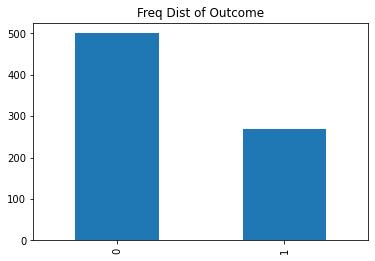

In [217]:
%matplotlib inline

bplt = train_df['Outcome'].value_counts().plot.bar(title = "Freq Dist of Outcome")
bplt;

Since the data is imbalanced, we have to apply SMOTE algorithm in an attempt to balance the data. 

In [264]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 343 

After OverSampling, the shape of train_X: (686, 9)
After OverSampling, the shape of train_y: (686,) 

After OverSampling, counts of label '1': 343
After OverSampling, counts of label '0': 343


We can see that the algorithm has balanced the number of yes and no. 

#### Logistic Regression After SMOTE:

In [265]:
# logistic regression (code from professor)

y_train_res, X_train_res = dmatrices('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', train_df, return_type="dataframe")
y_train_res = np.ravel(y_train_res)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train_res, y_train_res)

# check the accuracy on the training set
model.score(X_train_res, y_train_res)

0.7734375

Our new model has not change any score even after the SMOTE. 

New evaluation matrices with the new SMOTE dats. 

In [254]:
#Precision and Recall

logreg1 = LogisticRegression()

logreg1.fit(X_train_res, y_train_res.ravel())
predictions = logreg1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       157
         1.0       0.61      0.73      0.67        74

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.77      0.77       231



New accuracy is 77%. Which is not a great improvement, but certainly a small improvement. Precission has increased to 86%. 

#### ROC curve:

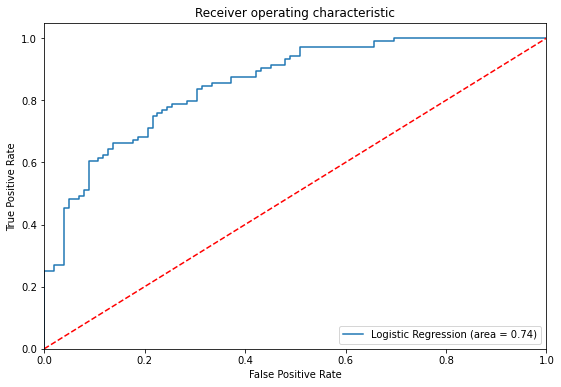

In [293]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

This model looks alright with the predicting power of 74%. This predicting power is a a little weak. This model is that convencing. 

#### Chi-Square

Chi-Square shows us the assemble of the importance of our variables.

In [297]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
target=train_df['Outcome'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,8):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, train_df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(507.30088589263414, 0.599303541425772), 6],
 [(239.44945230961298, 0.6055947545465781), 5],
 [(188.81183828305024, 0.4084898472900405), 4],
 [(148.98313772061886, 0.17785634501690417), 1],
 [(53.91088776284986, 0.32720630282162655), 3],
 [(52.02022351005954, 0.433955143789547), 7],
 [(36.25537055496166, 0.8206281799315805), 2],
 [(15.349745577641182, 0.49918714178401535), 0]]

This chi-square value is not of much significance to us, because the assumption is that the chi-square value greater than 0.05 is accepted and less than 0.05 is reject hypothesis. However, in the above data, all the values are greater than 0.05. So, chi-value is not very significant to us in this matter.

#### P-value

In [294]:
X=X_train_res
y=y_train_res

In [295]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462394
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.285     
Dependent Variable:    y                   AIC:                 728.2370  
Date:                  2022-06-24 22:01    BIC:                 770.0311  
No. Observations:      768                 Log-Likelihood:      -355.12   
Df Model:              8                   LL-Null:             -496.74   
Df Residuals:          759                 LLR p-value:         1.5073e-56
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
Intercept                -9.

The p-value higher than 0.05 is dropped in theory, so if were to further analyze the data, we would drop the features BloodPressure which has p-value 0.2155, SkinThickness which has p-value 0.6523, Insuline with p-value 0.1335 and Age with p-value 0.2225. 

In [150]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = new_df.drop("Outcome",1)   #Feature Matrix
y = new_df["Outcome"]            #Target Variable

In [151]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
be_df = cols
be_df = df[be_df]
be_df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
1,6,148,72,33.6,0.627
2,1,85,66,26.6,0.351
3,8,183,64,23.3,0.672
4,1,89,66,28.1,0.167
5,0,137,40,43.1,2.288


Backwards elimination predicts the dropping of the table almost like the p-value analysis.

### Creating Next Model: 

#### KNN Model

"KNN is a non-parametric method used for classification and regression.  The output is a class membership and is carried out by a vote.  That is, we assign an unknown value the same value as its k nearest neighbors. The name pretty much says it all. We note that normalizing the data can improve the training data.  A common idea to engage a more intelligent scheme than just voting, is to assign weights, for instance, one may use 1/d with d being the distance in terms of the weights applied to assign a value. There are also many different distance metrics that can be used. Effectively it is just taking L-p space and choosing an appropriate p." from professors notes.

In [312]:
# make a copy of data frame
test_df = new_df.copy()

#create a dataframe with all training data except the target column
X = test_df.drop(columns=['Outcome'])

In [313]:
#separate target values
y = test_df['Outcome'].values

#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [314]:
# splitting data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Because there are 5 important variables, as we saw in the previous section, we will generate values for 5 neighbours only. 

In [315]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [317]:
print(knn.predict(X_test))

[0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 0 1 1 0 1 0 0]


The model predicts diabetes from position starting with the first women through the last one.

In [318]:
#check accuracy of our model on the test data

knn.score(X_test, y_test)

0.7186147186147186

#### Compare

The accuracy of our KNN model is 71.86%, which is a little less than our logistic regression model. Logistic regression model had 74% accuracy.

#### Summary:

We started with our EDA analysis, where we discovered that our data was highly imbalanced. I used bar plot, box plot, correlation and scatterplot to find out the imbalance on data as well as found outliers. I replaced median values to replace some of the missing values where there were very few number of missing data. 

I ignored the attributes Insulin and SkinThickness which had more than 25% of the missing data. The logic behind that was that, it was too many missing values to replace with any other values and that could mislead our entire dataset. Another reason to ignore was because these attributes was that after some study on this domain, these two attributes didn't impact much on diabetes result. 

At the end of the EDA we could not say much about which variable impacted the most on diabetes result. We further continued with our logestic regression model. Created and tested testing and training data and calculated the score which was 77%. 

We also calculated logistic regression, which gave the accuracy of 0.76%. 

Now that our target data set was imbalanced which we saw using barplot, we used SMOTE technique to try to bring down the imbalance. We again calculated the logistic regression, but there was not any improvement. I assume, there is no improvement because the imbalance was not that bad, or it had to do something with the way I handled outliers. I would definitely try to go back and change my strategy on outliers, and see if that would make any difference if I wasn't bounded by the time. 

Next, we saw the classification report with precission, recall, f1-score and accuracy scores. These values were slightly different before and after SMOTE however I didn't witness any major change in stats. 

ROC curve was somewhat realistic, however the predicting power wasn't very robust. We calculated chi-score and p-value which showed us which variables were more importand among others. 

At last we developed another model called "KNN Model". This model had even less accuracy in predicting if an individual women had diabeties or not. We printed out the sample prediction of the test data. 

References: 

Notes from professor

Udemy videos on "Data Science With Python"

https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296#:~:text=A%20normal%20fasting%20blood%20glucose,(8.6%20mmol%2FL).


https://medical-dictionary.thefreedictionary.com/triceps+skin-fold+thickness#:~:text=A%20value%20used%20to%20estimate,%3B%20in%20females%2C%2023%20mm.


https://www.scientificamerican.com/article/world-s-obese-population-hits-641-million/